# Preparing working environment

In [1]:
# Importing librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Allowing modules autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# Importing the dataset
df_data = pd.read_csv("selected_data.csv", sep = ';')

# Internet access

In [3]:
# Creating dedicated dataset
df_internet = df_data[df_data['Indicator Code'] == "IT.NET.USER.P2"]

## World and region stats

In [4]:
# Global Internet access
from P2_analysis_scripts import world_stats
world_stats(df_internet)

count   mean    std    min    25%    50%    75%  \
World                       205.0  51.15  28.61   0.00  25.37  53.23  76.18   
East Asia & Pacific          34.0  48.32  28.26   0.00  25.28  46.25  76.51   
Europe & Central Asia        55.0  74.69  18.41  17.99  67.78  76.41  88.55   
Latin America & Caribbean    37.0  56.00  18.06  12.23  45.00  58.14  67.03   
Middle East & North Africa   21.0  57.96  25.72  13.13  39.21  61.18  77.29   
North America                 3.0  88.01  11.03  76.18  83.01  89.84  93.92   
South Asia                    8.0  28.31  16.02  10.60  17.56  24.62  34.48   
Sub-Saharan Africa           47.0  20.31  14.59   1.18   8.87  18.00  26.94   

                              max  
World                       98.24  
East Asia & Pacific         92.72  
Europe & Central Asia       98.24  
Latin America & Caribbean   93.54  
Middle East & North Africa  98.00  
North America               98.00  
South Asia                  59.09  
Sub-Saharan Africa          56.51

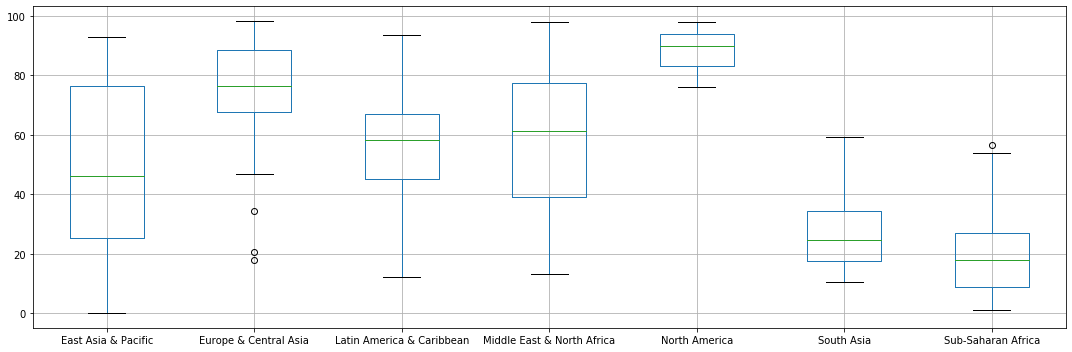

In [5]:
# Distribution of Internet access per world regions
from P2_analysis_scripts import region_boxplot
region_boxplot(df_internet)

## Searching for the outliers

In [6]:
# Europe & Central Asia outlier
df_internet[df_internet['Region'] == 'Europe & Central Asia'][
    ['Country Name', 'last_value']].sort_values(by=['last_value']).head(5)

Country Name  last_value
212     Turkmenistan   17.990324
203       Tajikistan   20.470000
124  Kyrgyz Republic   34.500000
220       Uzbekistan   46.791287
179       San Marino   49.600000

In [7]:
# Sub-Saharan Africa outlier
df_internet[df_internet['Region'] == 'Sub-Saharan Africa'][
    ['Country Name', 'last_value']].sort_values(by=['last_value']).tail(5)

Country Name  last_value
90          Gabon   48.052274
55     Cabo Verde   48.165277
144     Mauritius   53.226178
191  South Africa   54.000000
184    Seychelles   56.514708

## Top N

In [8]:
# World top and last countries on Internet Access
from P2_analysis_scripts import world_topN
world_topN(df_internet, world_n = 10, last = True)

Top countries  Top scores             Last countries  Last scores
1         Iceland   98.240016  Korea, Dem. People’s Rep.     0.000000
2   Liechtenstein   98.093904                    Eritrea     1.177119
3         Bermuda   98.000000                    Somalia     1.880000
4         Bahrain   97.999981              Guinea-Bissau     3.761414
5         Andorra   97.930637   Central African Republic     4.000000
6      Luxembourg   97.493930                      Niger     4.322758
7          Norway   97.298204                 Madagascar     4.713663
8         Denmark   96.967785                       Chad     5.000000
9          Monaco   95.208178                    Burundi     5.173627
10  Faroe Islands   95.108682           Congo, Dem. Rep.     6.209974

In [9]:
# Regional top and last
world_topN(df_internet[df_internet['Region'] == 'Europe & Central Asia'], world_n = 5, last = True)

Top countries  Top scores   Last countries  Last scores
1        Iceland   98.240016     Turkmenistan    17.990324
2  Liechtenstein   98.093904       Tajikistan    20.470000
3        Andorra   97.930637  Kyrgyz Republic    34.500000
4     Luxembourg   97.493930       Uzbekistan    46.791287
5         Norway   97.298204       San Marino    49.600000

## Mapping

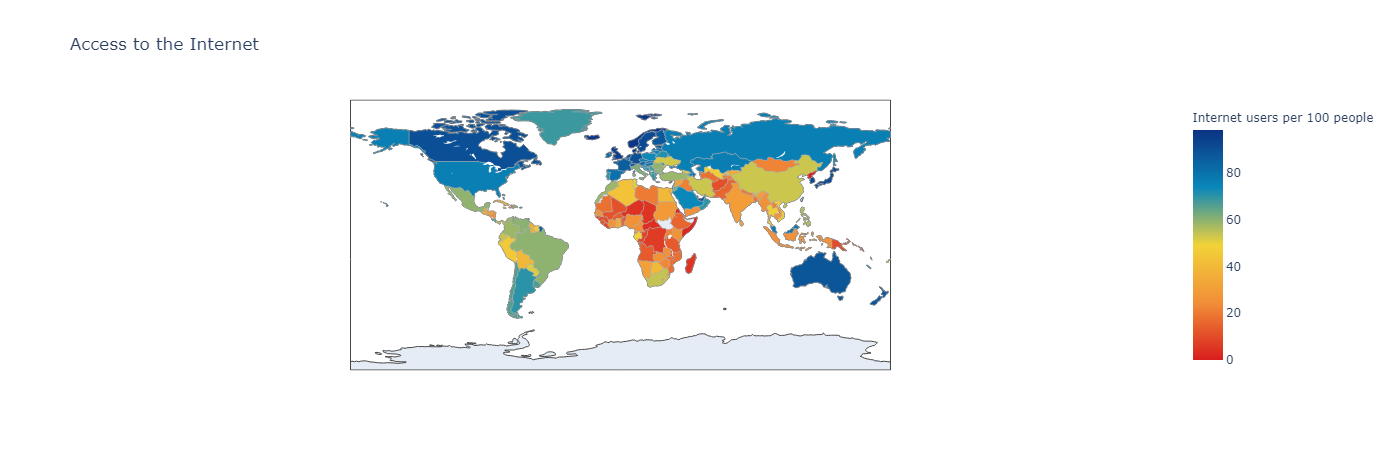

In [10]:
# Choropleth Map of Internet access
from P2_analysis_scripts import map_indic
map_indic(df_internet, indic_column = 'last_value', color_scale = 'Portland', reverse_scale = True,
          map_title = "Access to the Internet", scale_title = "Internet users per 100 people")

# Upper Secondary and tertiary students

In [11]:
# Creating dedicated dataset, merging total student population in a single dataset
df_nb_upper_sec = df_data[df_data['Indicator Code'] == "UIS.E.3"][[
    'Country Name', 'Country Code','Region','Indicator Name', 'last_value']].rename(columns = {'last_value' : 'Upper secondary'})

df_nb_tertiary = df_data[df_data['Indicator Code'] == "SE.TER.ENRL"][[
    'Country Name', 'Country Code','Region','Indicator Name', 'last_value']].rename(columns = {'last_value' : 'Tertiary'})

df_students = df_nb_upper_sec.merge(df_nb_tertiary, on = ['Country Name', 'Country Code', 'Region'], how = 'outer')
df_students['Total students'] = df_students['Upper secondary'].replace(np.NaN, 0) + df_students['Tertiary'].replace(np.NaN, 0)

# Adding intenet access for ponderation
df_internet2 = df_internet[['Country Name', 'Country Code','Region', 'Indicator Name', 'last_value']].rename(
    columns = {'last_value' : 'Internet Access'})

df_students = df_students.merge(df_internet2, on = ['Country Name', 'Country Code', 'Region'], how = 'outer')
df_students['Accessible students'] = (df_students['Total students'] * df_students['Internet Access'] / 100).round(0)

## General stats and boxplots

In [12]:
# Stats per world region
world_stats(df_students, 'Accessible students')

count        mean          std     min        25%  \
World                       199.0  1176688.67   4285096.11     0.0   15514.00   
East Asia & Pacific          31.0  2388398.81   8322394.37     0.0    2248.50   
Europe & Central Asia        53.0  1025960.53   1721968.48   761.0  121940.00   
Latin America & Caribbean    36.0   813350.89   2005483.27  1361.0    7661.75   
Middle East & North Africa   21.0   723288.95   1111932.14  3449.0  147994.00   
North America                 3.0  8399292.00  13371463.93  3098.0  689450.50   
South Asia                    8.0  3659957.25   8962459.72  5216.0  100934.00   
Sub-Saharan Africa           47.0   144628.53    378169.68   599.0    9768.00   

                                  50%         75%         max  
World                        133982.0    599603.5  46324760.0  
East Asia & Pacific           66910.0   1511326.0  46324760.0  
Europe & Central Asia        342935.0    839793.0   7194236.0  
Latin America & Caribbean    123477.5    465655.0  10883184.0  
Middle East & North Africa   284877.0    593047.0   4521378.0  
North America               1375803.0  12597389.0  23818975.0  
South Asia                   427175.5   1137542.5  25805339.0  
Sub-Saharan Africa            21456.0     69443.5   2154786.0

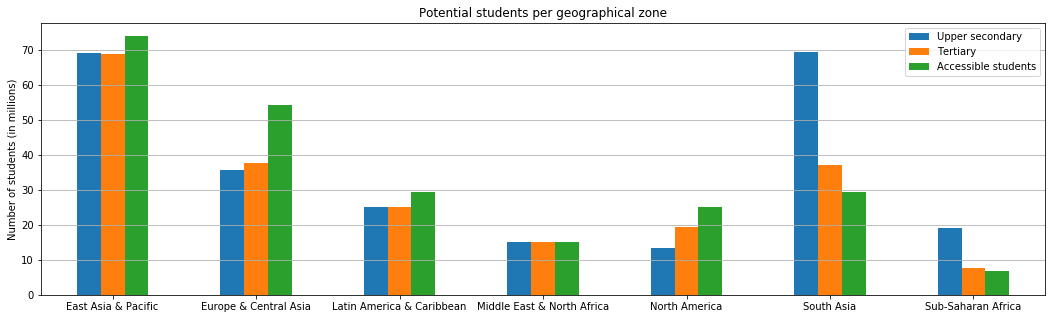

In [13]:
# Total per region
nb_student = df_students[['Region','Upper secondary','Tertiary', 'Accessible students']]

(nb_student.groupby(by = 'Region').sum()/1000000).plot.bar(figsize = (18,5))

plt.title("Potential students per geographical zone")
plt.xlabel("")
plt.xticks(rotation = 0)
plt.ylabel("Number of students (in millions)")
plt.gca().yaxis.grid(True)
plt.show()

## Boxplot

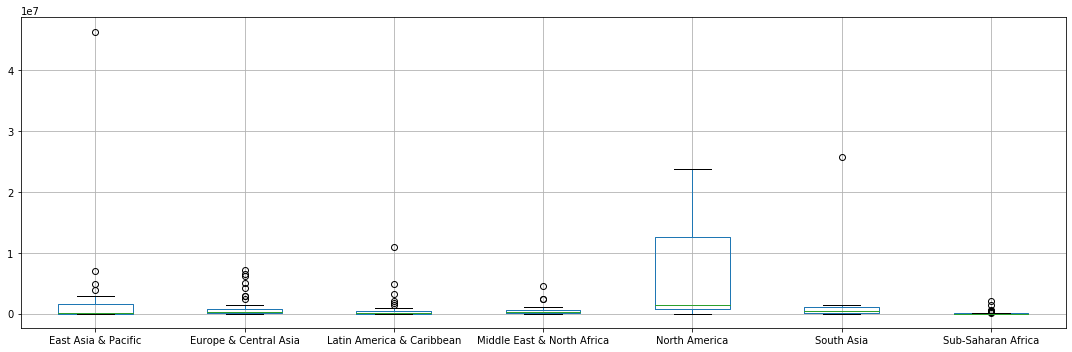

In [14]:
# Distribution per world region 
region_boxplot(df_students, col = 'Accessible students')

In [15]:
# East Asia Outliers
world_topN(df_students[df_students['Region'] == 'East Asia & Pacific'], col = 'Accessible students', world_n = 5, last = False)

Top countries  Top scores
1         China  46324760.0
2         Japan   6941750.0
3   Korea, Rep.   4795259.0
4     Indonesia   3807649.0
5   Philippines   2849367.0

In [16]:
# South Asian outliers
world_topN(df_students[df_students['Region'] == 'South Asia'], col = 'Accessible students', world_n = 3, last = False)

Top countries  Top scores
1         India  25805339.0
2    Bangladesh   1432945.0
3      Pakistan   1039075.0

In [17]:
# Data for North America
df_students[df_students['Region'] == 'North America']

Country Name Country Code         Region  \
45         Bermuda          BMU  North America   
58          Canada          CAN  North America   
215  United States          USA  North America   

                                      Indicator Name_x  Upper secondary  \
45   Enrolment in upper secondary education, both s...           2188.0   
58   Enrolment in upper secondary education, both s...        1531393.0   
215  Enrolment in upper secondary education, both s...       11736315.0   

                                      Indicator Name_y    Tertiary  \
45   Enrolment in tertiary education, all programme...       973.0   
58                                                 NaN         NaN   
215  Enrolment in tertiary education, all programme...  19531728.0   

     Total students                   Indicator Name  Internet Access  \
45           3161.0  Internet users (per 100 people)        98.000000   
58        1531393.0  Internet users (per 100 people)        89.840000   
215      31268043.0  Internet users (per 100 people)        76.176737   

     Accessible students  
45                3098.0  
58             1375803.0  
215           23818975.0

Missing Data for Canadian tertiary level of education

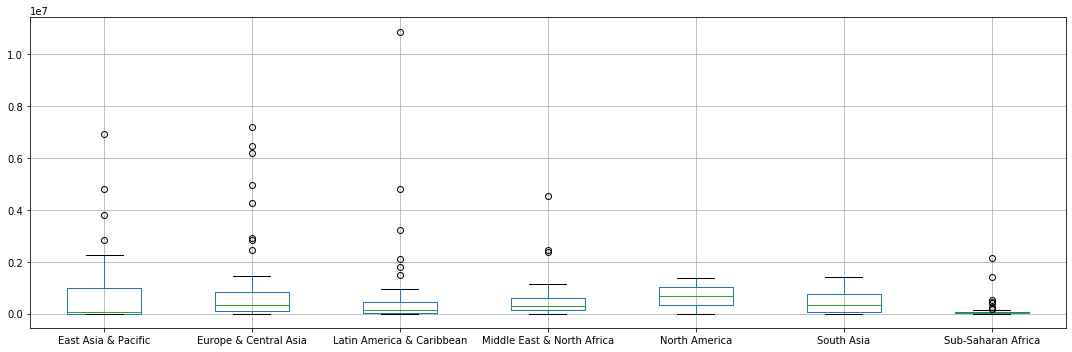

In [18]:
# Boxplot without top 3
region_boxplot(df_students[(df_students["Country Name"] != 'China') 
                           & (df_students["Country Name"] != 'India')
                           & (df_students["Country Name"] != 'United States')], col = 'Accessible students')

## Top 10 Worldwide

In [19]:
# Top countries per number of accessible students
world_topN(df_students, col = 'Accessible students' ,world_n = 10, last = True)

Top countries  Top scores             Last countries  Last scores
1                China  46324760.0  Korea, Dem. People’s Rep.          0.0
2                India  25805339.0                     Tuvalu        162.0
3        United States  23818975.0                      Palau        534.0
4               Brazil  10883184.0              Guinea-Bissau        599.0
5   Russian Federation   7194236.0                   Kiribati        651.0
6                Japan   6941750.0                  Gibraltar        761.0
7               Turkey   6452389.0                    Somalia        884.0
8       United Kingdom   6205933.0          Equatorial Guinea        930.0
9              Germany   4982347.0                 San Marino       1156.0
10              Mexico   4823804.0                     Monaco       1281.0

## Mapping

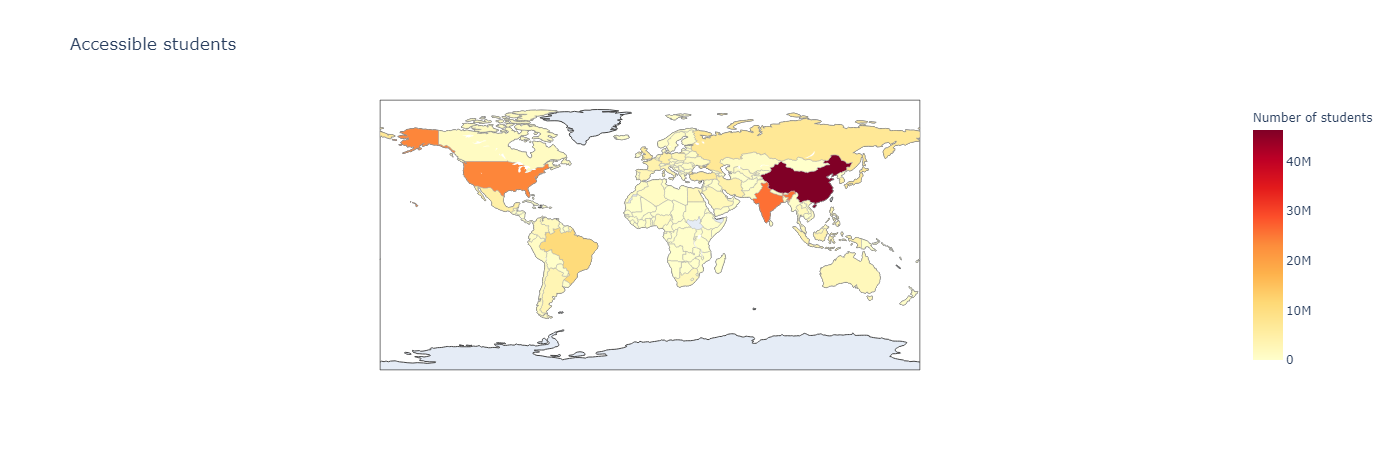

In [20]:
# Choropleth Map of potentiel clients
map_indic(df_students, indic_column = 'Accessible students', color_scale = 'YlOrRd', reverse_scale = False,
          map_title = "Accessible students", scale_title = "Number of students")

In [21]:
# Reducing the colorscale, by setting a maximum value to 10M students
df_students2 = df_students.copy()
df_students2["Accessible students"] = np.clip(df_students2["Accessible students"], 0, 10000000)

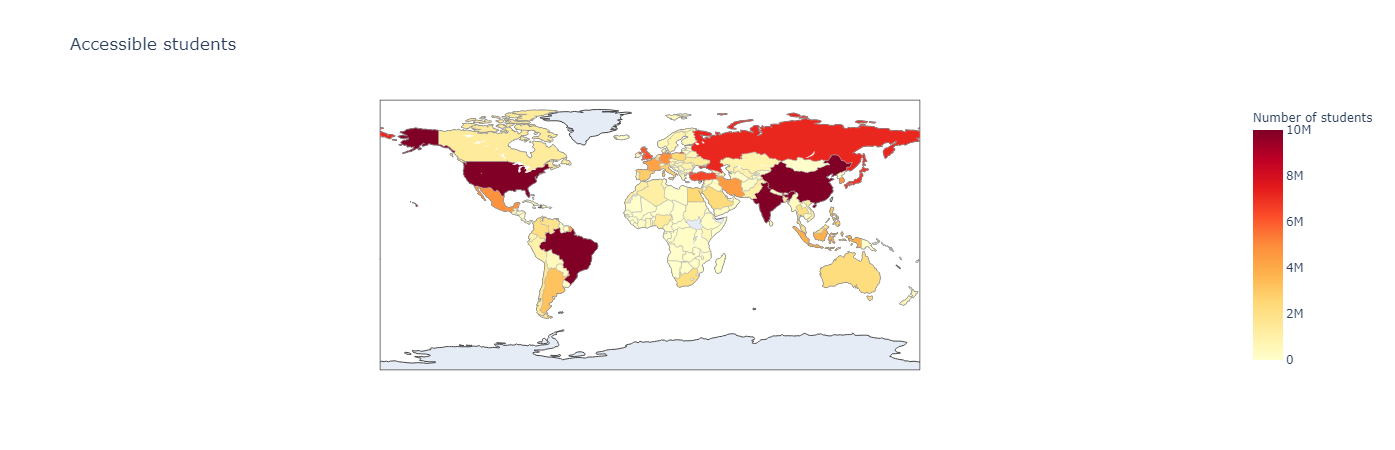

In [22]:
# Choropleth Map of potentiel clients (excluding top 3 )
map_indic(df_students2,
          indic_column = 'Accessible students', color_scale = 'YlOrRd', reverse_scale = False,
          scale_title = "Number of students", map_title = "Accessible students")

# Predicted student population growth

In [23]:
# Construction of a dedicated dataframe
df_future_students = df_data[df_data['Indicator Code'] == 'PRJ.POP.ALL.4.MF'].drop(
    columns = ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016',
              'nb_measure','last_year','last_value','nb_projected'])

## Plotting by world region

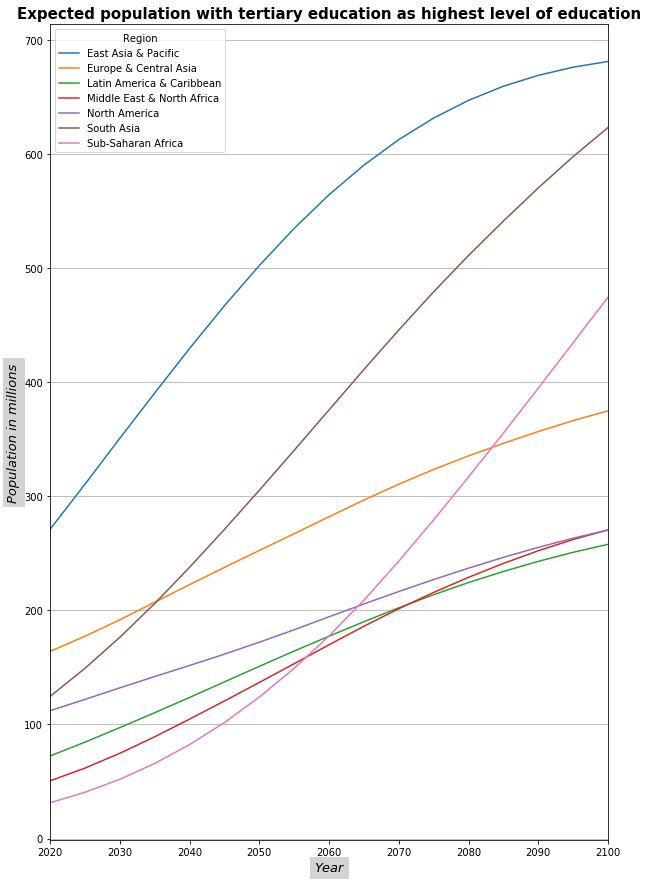

In [24]:
# Time series by continents
(df_future_students.groupby(by = 'Region').sum()/1000).T.plot(figsize = (10,15))
plt.title("Expected population with tertiary education as highest level of education", fontsize = 15, fontweight = 'bold')
plt.xlabel("Year", fontsize = 13, fontstyle = 'italic', backgroundcolor = 'lightgrey')
plt.ylabel("Population in millions", fontsize = 13, fontstyle = 'italic',backgroundcolor = 'lightgrey')
plt.gca().yaxis.grid(True)
plt.show()

## Expected progression per country

In [25]:
# Adding columns to calculate the projected student population growth
df_future_students['5y_growth'] = (df_future_students['2025'] - df_future_students['2020']) / df_future_students['2020']
df_future_students['10y_growth'] = (df_future_students['2030'] - df_future_students['2020']) / df_future_students['2020']
df_future_students['15y_growth'] = (df_future_students['2035'] - df_future_students['2020']) / df_future_students['2020']
df_future_students['20y_growth'] = (df_future_students['2040'] - df_future_students['2020']) / df_future_students['2020']

In [26]:
# Top countries
world_topN(df_future_students, col = '5y_growth', world_n = 10, last = True)

Top countries  Top scores      Last countries  Last scores
1          Timor-Leste    0.384595             Moldova    -0.008093
2             Tanzania    0.356430             Georgia     0.002710
3           Mozambique    0.353132             Ukraine     0.007429
4                Niger    0.351509  Russian Federation     0.019959
5              Burundi    0.348055              Latvia     0.021744
6               Uganda    0.338123            Bulgaria     0.022247
7             Ethiopia    0.332543             Estonia     0.025298
8   West Bank and Gaza    0.327821             Romania     0.025686
9                 Mali    0.327526           Lithuania     0.028538
10               Sudan    0.322435             Belarus     0.035945

In [27]:
# Top countries on a ten years basis
world_topN(df_future_students, col = '10y_growth', world_n = 10, last = False)

Top countries  Top scores
1       Tanzania    0.857224
2    Timor-Leste    0.851998
3          Niger    0.840203
4     Mozambique    0.830442
5         Uganda    0.792040
6           Mali    0.778862
7         Malawi    0.753832
8         Rwanda    0.753450
9        Burundi    0.745684
10       Liberia    0.724764

In [28]:
# Top countries on a fifteen years basis
world_topN(df_future_students, col = '15y_growth', world_n = 10, last = False)

Top countries  Top scores
1       Tanzania    1.535332
2          Niger    1.514335
3     Mozambique    1.430220
4    Timor-Leste    1.413512
5         Uganda    1.386016
6           Mali    1.384669
7         Rwanda    1.340781
8         Malawi    1.333154
9        Liberia    1.242417
10       Burundi    1.226306

In [29]:
# Top countries on a 20 years basis
world_topN(df_future_students, col = '20y_growth', world_n = 10, last = True)

Top countries  Top scores      Last countries  Last scores
1          Niger    2.433842             Moldova    -0.018815
2       Tanzania    2.378893             Georgia     0.007851
3           Mali    2.170732           Lithuania     0.082264
4     Mozambique    2.162123             Ukraine     0.084902
5         Uganda    2.141062              Latvia     0.088554
6         Malawi    2.098817             Romania     0.088564
7    Timor-Leste    2.090694            Bulgaria     0.105222
8         Rwanda    2.089762             Estonia     0.119901
9        Liberia    1.893834  Russian Federation     0.145214
10  Burkina Faso    1.842417             Armenia     0.161810

## Mapping projected 20 years growth

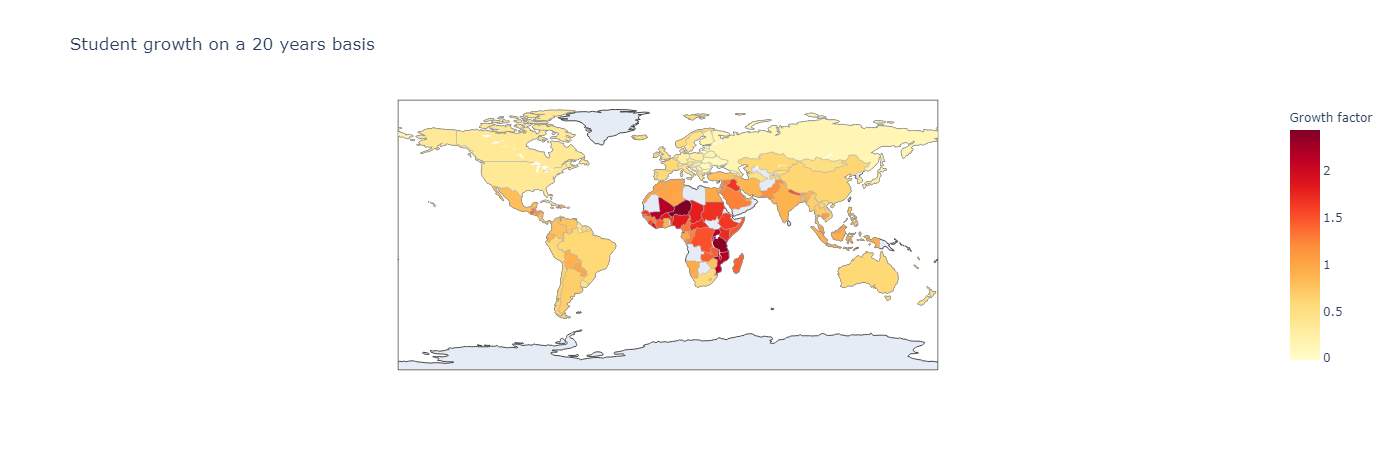

In [30]:
# Mapping
map_indic(df_future_students, indic_column = '20y_growth', color_scale = 'YlOrRd', reverse_scale = False,
          map_title = "Student growth on a 20 years basis", scale_title = "Growth factor")

# Students not in university who could be interrested by the plateform

## Construction of a dedicated dataframe

In [31]:
# Construction of usefull dataframe
df_oos_prospect = df_data[['Country Name', 'Country Code','Region']].drop_duplicates()

df_potential_tertiary = df_data[df_data['Indicator Code'] == 'SP.TER.TOTL.IN'][
    ['Country Name', 'Country Code','Region','last_value']].rename(
    columns = {'last_value' : 'Tertiary potential'}).replace(np.NaN, 0)

df_enrolment_tertiary = df_data[df_data['Indicator Code'] == 'SE.TER.ENRR'][
    ['Country Name', 'Country Code','Region','last_value']].rename(
    columns = {'last_value' : 'Tertiary enrolment rate'})

df_enrolment_upper = df_data[df_data['Indicator Code'] == 'SE.SEC.ENRR.UP'][
    ['Country Name', 'Country Code','Region','last_value']].rename(
    columns = {'last_value' : 'Upper secondary enrolment rate'})

In [32]:
# Merging for getting interesting data in the same dataset
df_oos_prospect = df_oos_prospect.merge(
    df_potential_tertiary, on = ['Country Name', 'Country Code', 'Region'], how = 'left').merge(
    df_enrolment_tertiary, on = ['Country Name', 'Country Code', 'Region'], how = 'left').merge(
    df_nb_upper_sec, on = ['Country Name', 'Country Code', 'Region'], how = 'left').merge(
    df_enrolment_upper, on = ['Country Name', 'Country Code', 'Region'], how = 'left').merge(
    df_internet2, on = ['Country Name', 'Country Code', 'Region'], how = 'left').drop(
    columns = ['Indicator Name_x','Indicator Name_y'])

In [33]:
# Adjustment of enrollment rates (rates above 100% reduced to 100%)
df_oos_prospect['Tertiary enrolment rate'] = df_oos_prospect['Tertiary enrolment rate'].apply(lambda x : 100 if x>100 else x )
df_oos_prospect['Upper secondary enrolment rate'] = df_oos_prospect['Upper secondary enrolment rate'].apply(lambda x : 100 if x>100 else x )

In [34]:
df_oos_prospect

Country Name Country Code  \
0                                           Arab World          ARB   
1                                  East Asia & Pacific          EAS   
2          East Asia & Pacific (excluding high income)          EAP   
3                                            Euro area          EMU   
4                                Europe & Central Asia          ECS   
5        Europe & Central Asia (excluding high income)          ECA   
6                                       European Union          EUU   
7               Heavily indebted poor countries (HIPC)          HPC   
8                                          High income          HIC   
9                            Latin America & Caribbean          LCN   
10   Latin America & Caribbean (excluding high income)          LAC   
11        Least developed countries: UN classification          LDC   
12                                 Low & middle income          LMY   
13                                          Low income          LIC   
14                                 Lower middle income          LMC   
15                          Middle East & North Africa          MEA   
16   Middle East & North Africa (excluding high inc...          MNA   
17                                       Middle income          MIC   
18                                       North America          NAC   
19                                        OECD members          OED   
20                                          South Asia          SAS   
21                                  Sub-Saharan Africa          SSF   
22          Sub-Saharan Africa (excluding high income)          SSA   
23                                 Upper middle income          UMC   
24                                               World          WLD   
25                                         Afghanistan          AFG   
26                                             Albania          ALB   
27                                             Algeria          DZA   
28                                             Andorra          AND   
29                                              Angola          AGO   
..                                                 ...          ...   
208                                              Tonga          TON   
209                                Trinidad and Tobago          TTO   
210                                            Tunisia          TUN   
211                                             Turkey          TUR   
212                                       Turkmenistan          TKM   
213                                             Tuvalu          TUV   
214                                             Uganda          UGA   
215                                            Ukraine          UKR   
216                               United Arab Emirates          ARE   
217                                     United Kingdom          GBR   
218                                      United States          USA   
219                                            Uruguay          URY   
220                                         Uzbekistan          UZB   
221                                            Vanuatu          VUT   
222                                      Venezuela, RB          VEN   
223                                            Vietnam          VNM   
224                              Virgin Islands (U.S.)          VIR   
225                                 West Bank and Gaza          PSE   
226                                        Yemen, Rep.          YEM   
227                                             Zambia          ZMB   
228                                           Zimbabwe          ZWE   
229                                            Curacao          CUW   
230                          Sint Maarten (Dutch part)          SXM   
231                           Turks and Caicos Islands          TCA   
232                                        South Sudan          SS

In [35]:
# Construction of the out-of-school prospects indicator
df_oos_prospect['OOS upper sec'] = df_oos_prospect['Upper secondary'] * (1-df_oos_prospect['Upper secondary enrolment rate']/100) / (df_oos_prospect['Upper secondary enrolment rate']/100)
    
df_oos_prospect['OOS tertiary'] = df_oos_prospect['Tertiary potential'] * (1-df_oos_prospect['Tertiary enrolment rate']/100)
    
df_oos_prospect['Accessible prospect'] = (df_oos_prospect['OOS upper sec'] + df_oos_prospect['OOS tertiary']) * df_oos_prospect['Internet Access']

## General stats

In [36]:
# World stats per world region
world_stats(df_oos_prospect, 'Accessible prospect')

count          mean           std         min  \
World                       175.0  9.226799e+07  3.706282e+08        0.00   
East Asia & Pacific          23.0  2.166230e+08  6.802784e+08        0.00   
Europe & Central Asia        48.0  2.610845e+07  3.990623e+07        0.00   
Latin America & Caribbean    31.0  5.956368e+07  1.430814e+08    53441.47   
Middle East & North Africa   19.0  6.213285e+07  6.817476e+07  1279084.17   
North America                 2.0  1.555339e+08  2.193926e+08   399945.69   
South Asia                    8.0  5.544792e+08  1.206825e+09  2669566.68   
Sub-Saharan Africa           44.0  4.857875e+07  8.174644e+07   453326.62   

                                    25%           50%           75%  \
World                        4036442.49  1.469373e+07  5.600812e+07   
East Asia & Pacific          1492240.11  1.243111e+07  1.240161e+08   
Europe & Central Asia        4455986.37  1.051222e+07  2.090054e+07   
Latin America & Caribbean    2551120.92  1.469373e+07  4.500296e+07   
Middle East & North Africa  16271159.56  3.686050e+07  8.793218e+07   
North America               77966946.59  1.555339e+08  2.331009e+08   
South Asia                  31102595.58  5.934527e+07  3.665274e+08   
Sub-Saharan Africa           4673828.21  1.274748e+07  5.786158e+07   

                                     max  
World                       3.515574e+09  
East Asia & Pacific         3.278268e+09  
Europe & Central Asia       1.718535e+08  
Latin America & Caribbean   6.282769e+08  
Middle East & North Africa  2.484281e+08  
North America               3.106679e+08  
South Asia                  3.515574e+09  
Sub-Saharan Africa          4.404065e+08

## Top10 Worldwide

In [37]:
world_topN(df_oos_prospect, col = 'Accessible prospect' ,world_n = 10, last = False)

Top countries    Top scores
1           India  3.515574e+09
2           China  3.278268e+09
3          Mexico  6.282769e+08
4          Brazil  5.384067e+08
5       Indonesia  4.837997e+08
6         Nigeria  4.404065e+08
7        Pakistan  3.998045e+08
8     Philippines  3.809977e+08
9      Bangladesh  3.554350e+08
10  United States  3.106679e+08

Tricky indicator : out of school prospects in top countries might be whose without internet access. May only be relevant in industrialised countries (with large access to internet ?)

Seems less dangerous to rely on completion rate for finding prospects.

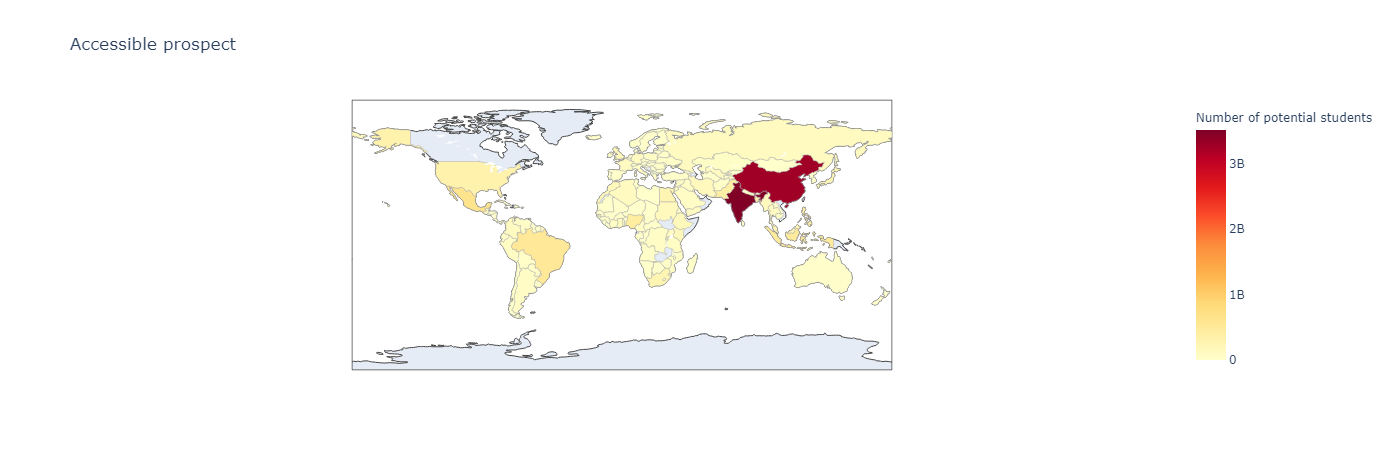

In [38]:
# Mapping
map_indic(df_oos_prospect, indic_column = 'Accessible prospect', color_scale = 'YlOrRd', reverse_scale = False,
          map_title = "Accessible prospect", scale_title = "Number of potential students")

# Income group

In [39]:
# Creation of a dedicated dataset
df_income = df_data[df_data['Income Group'].isna() == False][[
    'Country Name', 'Country Code','Region', 'Income Group']].drop_duplicates()

In [40]:
# Look on the different possible values
df_income['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [41]:
# Mapping the income group
df_income['Income index'] = df_income['Income Group']

df_income['Income index'] = df_income['Income index'].replace('Low income', 1).replace('Lower middle income', 2).replace(
    'Upper middle income',3).replace('High income: nonOECD',4).replace('High income: OECD',5)

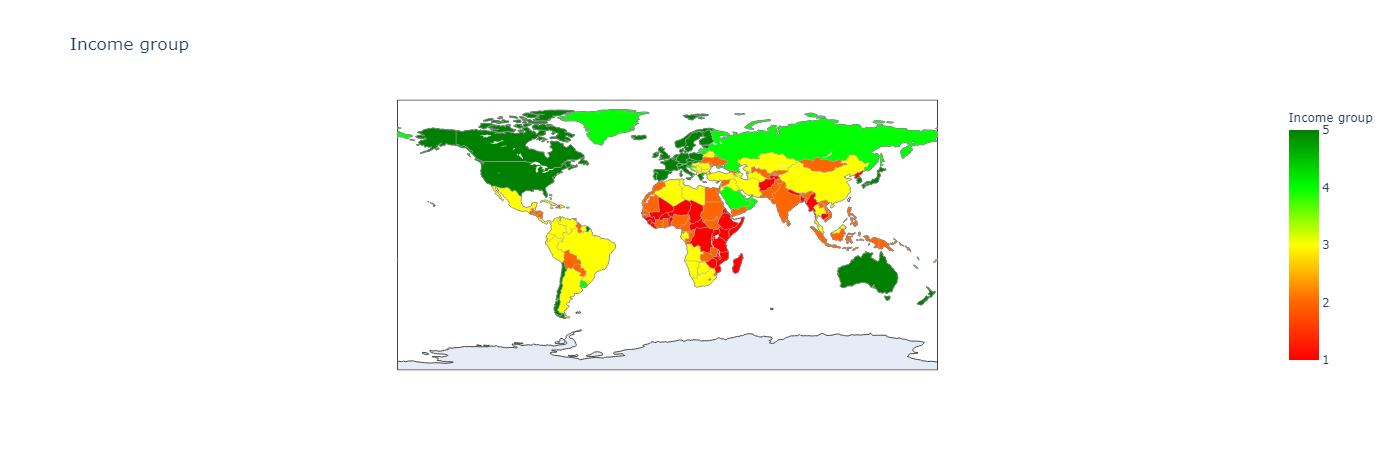

In [42]:
income_scale = [[0, 'rgb(255,0,0)'],
                [0.25, 'rgb(255,102,0)'],
                [0.50, 'rgb(255,255,0)'],
                [0.75, 'rgb(0,255,0)'],
                [1, 'rgb(0,128,0)']]

map_indic(df_income, indic_column = 'Income index', color_scale = income_scale, reverse_scale = False,
          map_title = "Income group", scale_title = "Income group")

In [43]:
# Counting the number of countries per income group and per world region
df_income[['Income Group','Region','Country Name']].groupby(by = ['Income Group', 'Region'], as_index = False).count().pivot(
    index = 'Income Group', columns = 'Region', values = 'Country Name')

Region                East Asia & Pacific  Europe & Central Asia  \
Income Group                                                       
High income: OECD                     4.0                   23.0   
High income: nonOECD                  7.0                   11.0   
Low income                            3.0                    1.0   
Lower middle income                  12.0                    7.0   
Upper middle income                   9.0                   13.0   

Region                Latin America & Caribbean  Middle East & North Africa  \
Income Group                                                                  
High income: OECD                           1.0                         1.0   
High income: nonOECD                       13.0                         7.0   
Low income                                  1.0                         NaN   
Lower middle income                         7.0                         6.0   
Upper middle income                        18.0                         7.0   

Region                North America  South Asia  Sub-Saharan Africa  
Income Group                                                         
High income: OECD               2.0         NaN                 NaN  
High income: nonOECD            1.0         NaN                 1.0  
Low income                      NaN         3.0                26.0  
Lower middle income             NaN         4.0                14.0  
Upper middle income             NaN         1.0                 7.0

# GDP per capita

In [44]:
# Construction of a dedicated dataframe
df_GDP = df_data[df_data['Indicator Code'] == "NY.GDP.PCAP.PP.KD"][[
    'Country Name', 'Country Code','Region','Indicator Name', 'last_value']]

In [45]:
# Global statistics
world_stats(df_GDP)

count      mean       std       min       25%  \
World                       192.0  18802.98  20209.75    647.88   3709.49   
East Asia & Pacific          30.0  20683.30  25650.40   1955.16   3767.32   
Europe & Central Asia        50.0  28767.78  18504.26   2762.59  15667.49   
Latin America & Caribbean    35.0  15823.78   9979.18   1653.96   8525.50   
Middle East & North Africa   19.0  30121.61  29694.69   2325.07  10535.64   
North America                 3.0  49032.96   5319.27  43087.76  46878.54   
South Asia                    8.0   6569.48   4564.38   1739.58   3063.93   
Sub-Saharan Africa           47.0   4797.60   6112.66    647.88   1501.07   

                                 50%       75%        max  
World                       11713.88  26118.03  118207.13  
East Asia & Pacific          7841.87  32656.61   96565.89  
Europe & Central Asia       25852.42  39449.75   94764.97  
Latin America & Caribbean   13877.99  20462.90   49903.03  
Middle East & North Africa  16086.92  42032.71  118207.13  
North America               50669.31  52005.57   53341.82  
South Asia                   5473.64   9044.28   14581.42  
Sub-Saharan Africa           2009.96   4843.22   26319.16

In [46]:
# Top N
world_topN(df_GDP)

Top countries     Top scores            Last countries  Last scores
1                  Qatar  118207.134623  Central African Republic   647.880445
2       Macao SAR, China   96565.889805                   Burundi   721.176562
3             Luxembourg   94764.974767          Congo, Dem. Rep.   743.894342
4              Singapore   81443.356456                   Liberia   753.557379
5      Brunei Darussalam   71788.783234                     Niger   914.467036
6                 Kuwait   68861.792098                    Malawi  1083.801421
7   United Arab Emirates   67133.065519                Mozambique  1128.279294
8                 Norway   64179.038815              Sierra Leone  1368.829098
9                Ireland   62991.909028                      Togo  1382.109747
10           Switzerland   57430.053265                Madagascar  1396.669615

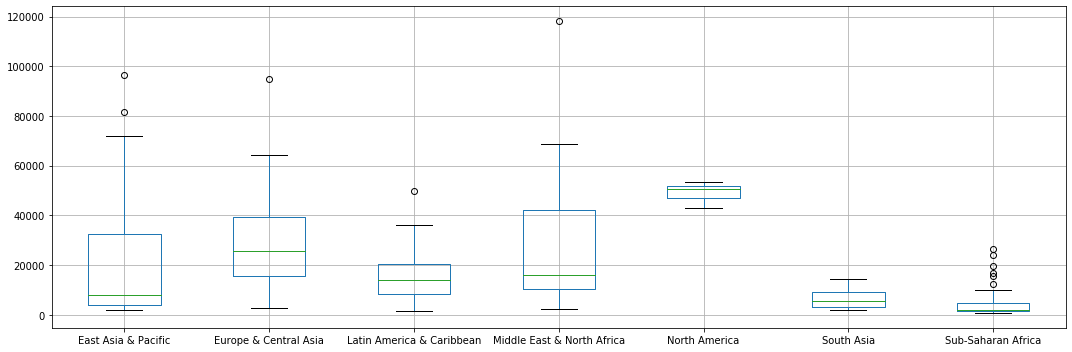

In [47]:
# Boxplot
region_boxplot(df_GDP)

In [48]:
# Restricting GDP per capita scale at a maximum of 60 k$
df_GDP2 = df_GDP.copy()
df_GDP2["last_value"] = np.clip(df_GDP2["last_value"]/1000, 0, 60)

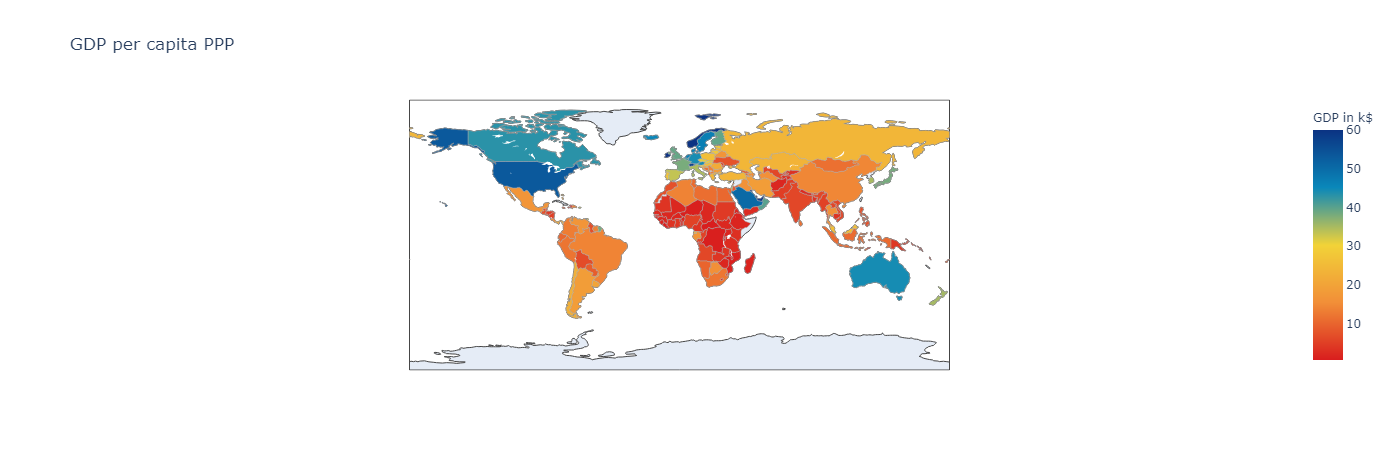

In [49]:
# Mapping
map_indic(df_GDP2, 'last_value', 'Portland', reverse_scale = True, map_title = "GDP per capita PPP", scale_title = "GDP in k$")

# Pupil - Teacher ratio

## DataFrames

In [50]:
# Dedicated dataframe
df_PTratio_sec = df_data[df_data['Indicator Code'] == 'UIS.PTRHC.3']
df_PTratio_ter = df_data[df_data['Indicator Code'] == 'UIS.PTRHC.56']

## Global stats

In [51]:
# World stats on pupil per teacher in upper secondary
world_stats(df_PTratio_sec, col = 'last_value')

count   mean   std   min    25%    50%    75%  \
World                       159.0  15.69  7.19  4.60  10.39  14.16  19.29   
East Asia & Pacific          26.0  18.61  5.95  8.35  14.35  17.39  22.59   
Europe & Central Asia        43.0  11.63  3.28  5.68   8.91  11.38  13.46   
Latin America & Caribbean    30.0  14.87  6.85  4.60  10.58  13.51  18.88   
Middle East & North Africa   19.0  12.78  5.34  4.78   8.78  11.42  17.84   
North America                 3.0  10.47  4.09  6.63   8.31  10.00  12.39   
South Asia                    8.0  23.25  9.88  8.38  16.26  26.16  30.96   
Sub-Saharan Africa           30.0  20.15  8.27  6.43  15.55  17.73  24.71   

                              max  
World                       43.67  
East Asia & Pacific         31.23  
Europe & Central Asia       21.26  
Latin America & Caribbean   34.71  
Middle East & North Africa  24.17  
North America               14.77  
South Asia                  33.24  
Sub-Saharan Africa          43.67

In [52]:
# World stats on pupil per teacher in tertiary
world_stats(df_PTratio_ter, col = 'last_value')

count   mean    std    min    25%    50%    75%  \
World                       173.0  18.80  14.19   1.87  10.88  15.52  22.60   
East Asia & Pacific          22.0  17.34   6.35   7.08  12.32  17.58  21.47   
Europe & Central Asia        49.0  14.22   7.63   3.76   9.93  12.56  17.34   
Latin America & Caribbean    31.0  14.29   6.38   3.59   9.77  14.51  17.44   
Middle East & North Africa   20.0  21.08  11.96   4.99  15.39  19.52  23.87   
North America                 2.0  15.59   4.42  12.46  14.02  15.59  17.15   
South Asia                    8.0  25.43  19.00   1.87  15.11  23.38  29.52   
Sub-Saharan Africa           41.0  26.20  22.40   7.55  15.23  21.64  29.28   

                               max  
World                       147.56  
East Asia & Pacific          27.47  
Europe & Central Asia        44.51  
Latin America & Caribbean    27.71  
Middle East & North Africa   64.41  
North America                18.71  
South Asia                   60.01  
Sub-Saharan Africa          147.56

## Box plots

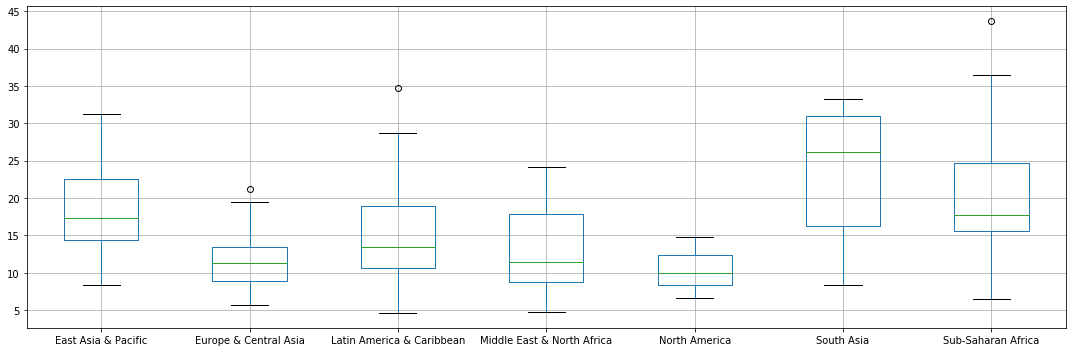

In [53]:
region_boxplot(df_PTratio_sec, col = 'last_value')

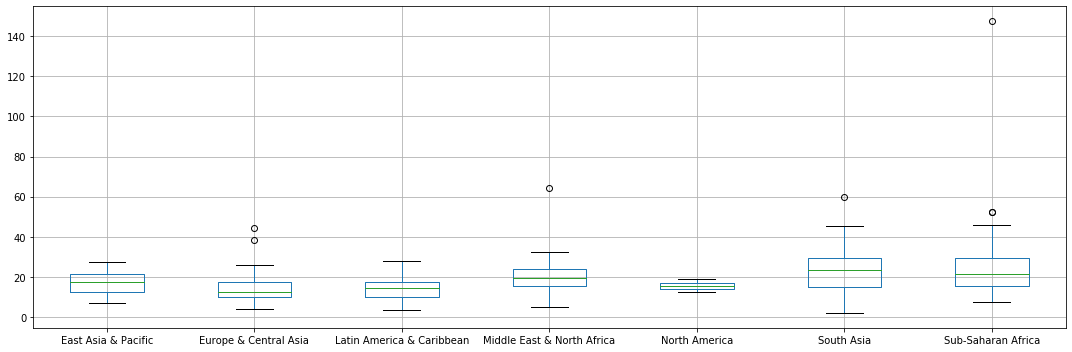

In [54]:
region_boxplot(df_PTratio_ter, col = 'last_value')

## Top tens

In [55]:
world_topN(df_PTratio_sec, col = 'last_value' ,world_n = 10, last = True)

Top countries  Top scores          Last countries  Last scores
1       Ethiopia   43.665588          Cayman Islands      4.60123
2     Mozambique   36.497959                   Libya      4.77599
3        Eritrea   35.801010               Gibraltar      5.67606
4      Nicaragua   34.714489     St. Kitts and Nevis      6.14423
5     Bangladesh   33.241470                 Comoros      6.43370
6          India   33.019581                 Croatia      6.43401
7       Thailand   31.234230                 Bermuda      6.62691
8        Vanuatu   31.204679  British Virgin Islands      6.74468
9    Afghanistan   30.278370                  Kuwait      6.76887
10      Pakistan   28.788601                 Georgia      7.30959

In [56]:
world_topN(df_PTratio_ter, col = 'last_value' ,world_n = 10, last = True)

Top countries  Top scores             Last countries  Last scores
1          Guinea-Bissau  147.559998                   Maldives      1.87179
2   Syrian Arab Republic   64.406418  Sint Maarten (Dutch part)      3.59259
3                  Nepal   60.009689                 Luxembourg      3.75849
4                   Mali   52.412720                    Grenada      4.26408
5               Cameroon   52.280418                    Andorra      4.55455
6                  Sudan   45.997749                       Cuba      4.59684
7              Sri Lanka   45.222099                    Lebanon      4.98637
8                 Greece   44.506210               Turkmenistan      5.44319
9             Mauritania   42.953129              Liechtenstein      6.30252
10                Turkey   38.420639                    Armenia      6.86902

## Choropleths

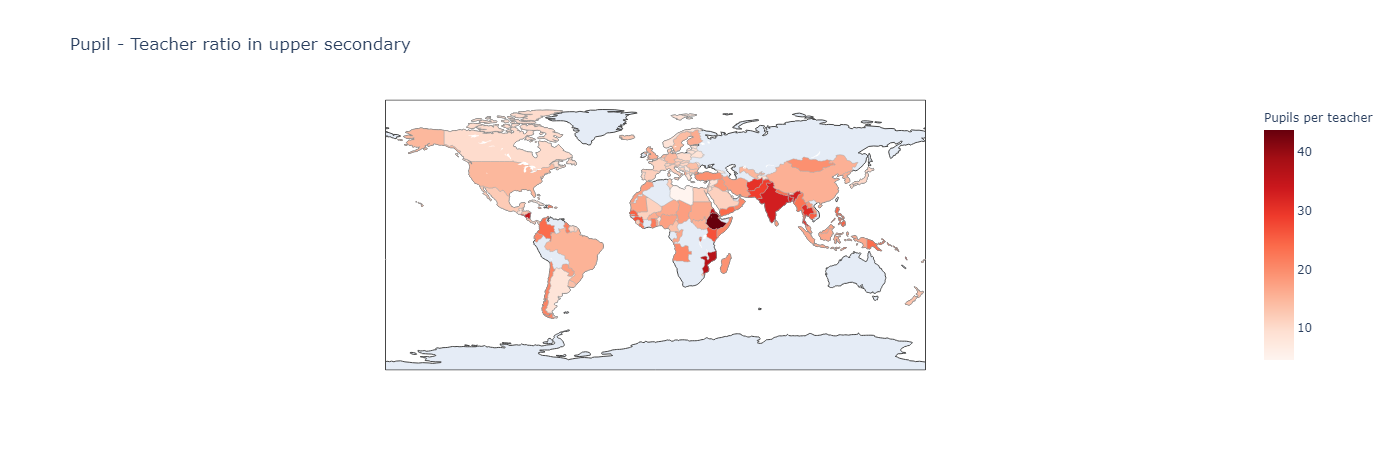

In [57]:
map_indic(df_PTratio_sec, indic_column = 'last_value', color_scale = 'Reds', reverse_scale = False,
          map_title = "Pupil - Teacher ratio in upper secondary", scale_title = "Pupils per teacher")

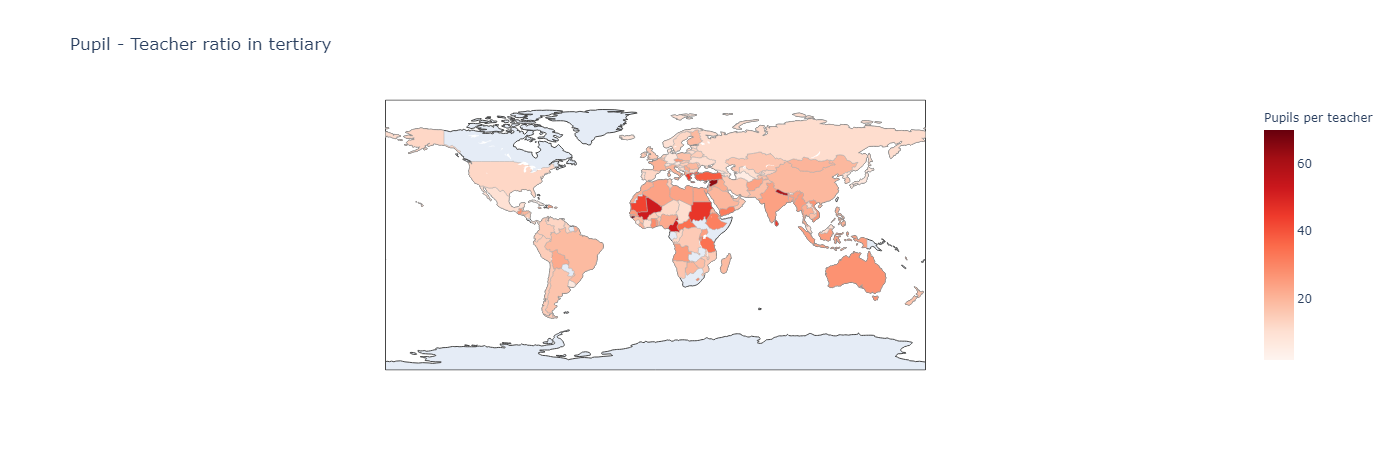

In [58]:
df_PTratio_ter2 = df_PTratio_ter.copy()
df_PTratio_ter2["last_value"] = np.clip(df_PTratio_ter["last_value"], 0, 70)

map_indic(df_PTratio_ter2, indic_column = 'last_value', color_scale = 'Reds', reverse_scale = False,
          map_title = "Pupil - Teacher ratio in tertiary", scale_title = "Pupils per teacher")

# Table of ranks per country

## Creation of a dataFrame containing all studied indicators, with normalization

In [59]:
# Base dataset
df_ranks = df_data[df_data['Region'].isna() == False][
    ['Country Name','Country Code','Region','Income Group']].drop_duplicates()

In [60]:
# Adding normalized internet access
from P2_analysis_scripts import normalize_serie

df_ranks = df_ranks.merge(df_internet[['Country Code','last_value']], on = 'Country Code', how = 'left')
df_ranks['Internet Access'] = normalize_serie(df_ranks['last_value'])
df_ranks = df_ranks.rename(columns = {'last_value' : 'Internet access'})

In [61]:
# Adding normalized number of students
df_ranks = df_ranks.merge(df_students[['Country Code','Accessible students']], on = 'Country Code', how = 'left')
df_ranks['Accessible Students'] = normalize_serie(np.clip(df_ranks["Accessible students"], 0, 10000000))

In [62]:
# Adding normalized growth rate on 20 years
df_ranks = df_ranks.merge(df_future_students[['Country Code','20y_growth']], on = 'Country Code', how = 'left')
df_ranks['20 years growth'] = normalize_serie(df_ranks['20y_growth'])

In [63]:
# Adding normalized pupils per teacher ratio
df_ranks = df_ranks.merge(df_PTratio_sec[['Country Code','last_value']], on = 'Country Code', how = 'left')
df_ranks['Pupils per Teacher(sec)'] = normalize_serie(df_ranks['last_value'])
df_ranks = df_ranks.rename(columns = {'last_value' : 'PTR_sec'})

df_ranks = df_ranks.merge(df_PTratio_ter[['Country Code','last_value']], on = 'Country Code', how = 'left')
df_ranks['Pupils per Teacher(ter)'] = normalize_serie(df_ranks['last_value'])
df_ranks = df_ranks.rename(columns = {'last_value' : 'PTR_ter'})

In [64]:
# Adding normalized GDP
df_ranks = df_ranks.merge(df_GDP[['Country Code','last_value']], on = "Country Code", how = 'left')
df_ranks['GDP per capita (PPP)'] = normalize_serie(np.clip(df_ranks['last_value'], 0, 60000))
df_ranks = df_ranks.rename(columns = {'last_value' : 'GDP per capita'})

## Conversion into a Heatmap

In [65]:
# Creation of a dedicated heatmap table
import seaborn as sns
df_heatmap = df_ranks[[
    'GDP per capita (PPP)','Internet Access','Accessible Students','20 years growth',
    'Pupils per Teacher(sec)','Pupils per Teacher(ter)'
    ]].copy().set_index(df_ranks['Country Name'])

df_heatmap["sum"] = df_heatmap.sum(axis = 1)
df_heatmap = df_heatmap.sort_values(by = ['sum'], ascending = False)

In [66]:
# Visualization of the table
df_heatmap

GDP per capita (PPP)  Internet Access  \
Country Name                                                       
United States                          0.887819         0.775415   
United Kingdom                         0.650052         0.964737   
Saudi Arabia                           0.839234         0.750722   
India                                  0.091737         0.300765   
Turkey                                 0.389348         0.593930   
Japan                                  0.633582         0.936482   
Germany                                0.734809         0.912531   
Qatar                                  1.000000         0.959804   
Korea, Rep.                            0.578547         0.943776   
Macao SAR, China                       1.000000         0.831056   
France                                 0.630323         0.871561   
Brazil                                 0.225364         0.607520   
Norway                                 1.000000         0.990413   
China                                  0.231695         0.541531   
United Arab Emirates                   1.000000         0.922231   
Singapore                              1.000000         0.824511   
Luxembourg                             1.000000         0.992405   
Kuwait                                 1.000000         0.797713   
Bahrain                                0.729184         0.997557   
Netherlands                            0.786068         0.920307   
Switzerland                            0.956700         0.910073   
Sweden                                 0.775274         0.931462   
Australia                              0.737398         0.898195   
Iceland                                0.751929         1.000000   
Malaysia                               0.421569         0.801998   
Denmark                                0.763552         0.987050   
Ireland                                1.000000         0.836418   
Spain                                  0.550970         0.820046   
Belgium                                0.697714         0.880665   
Finland                                0.654992         0.892749   
...                                         ...              ...   
Botswana                               0.253999         0.400682   
Guam                                        NaN         0.783896   
Georgia                                0.145385         0.508974   
Tonga                                  0.078841         0.406657   
Tajikistan                             0.035630         0.208367   
Zimbabwe                               0.020753         0.235342   
Haiti                                  0.016951         0.124518   
Greenland                                   NaN         0.697281   
Kyrgyz Republic                        0.044549         0.351181   
Marshall Islands                       0.051935         0.303214   
Cuba                                        NaN         0.394604   
Turkmenistan                           0.252737         0.183126   
Papua New Guinea                       0.054428         0.097736   
Djibouti                               0.041976         0.133702   
Virgin Islands (U.S.)                       NaN         0.606762   
Togo                                   0.012371         0.115126   
Solomon Islands                        0.024006         0.111980   
Libya                                  0.177667         0.206353   
Kiribati                               0.022026         0.139454   
Tuvalu                                 0.046124         0.468334   
Micronesia, Fed. Sts.                  0.043901         0.339497   
Korea, Dem. People’s Rep.                   NaN         0.000000   
Nauru                                       NaN              NaN   
South Sudan                            0.022185              NaN   
Kosovo                                 0.146310              NaN   
British Virgin Islands                      NaN              NaN   
Sint Maarten (D

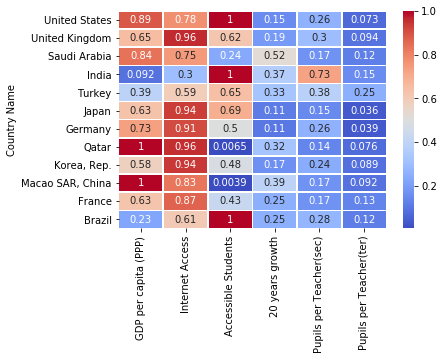

In [67]:
# Creation of the heatmap showing top 12 countries
sns.heatmap(df_heatmap[0:12].drop(columns = ['sum']), cmap = 'coolwarm', square = False, linewidth = .5, annot = True)
plt.show()